# Parte 2 - Ejercicios Teóricos y Prácticos

## Tasks 1
Suponga que la cantidad promedio de buses que llegan a una parada de bus dada es de 2 cada 30 minutos.
Considere X como la cantidad de buses que llegan a la mencionada parada de bus.


1. ¿Puede ser este evento modelado por una distribución de Poisson? ¿Por qué?

- Si porque es medido en un intervalo de tiempo y hay un promedio de ocurrencias en ese intervalo.

2. Calcule y grafique la probabilidad para diferentes números de buses, yendo desde 0 hasta 100. ¿Cuál es la
cantidad de buses más probable?


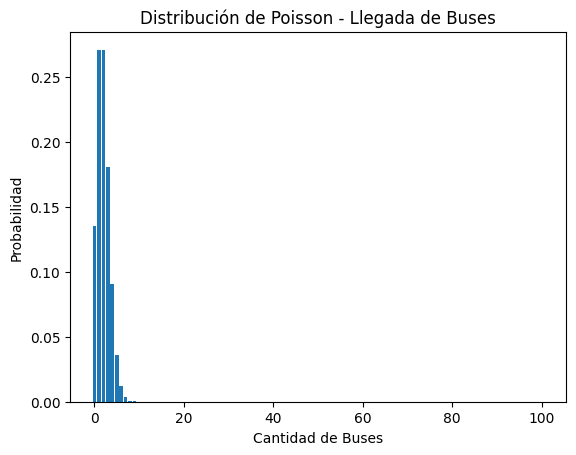

La cantidad de buses más probable es: 1 buses


In [12]:
import math
import matplotlib.pyplot as plt

def poisson(lambd, k):
    return (math.exp(-lambd) * lambd**k) / math.factorial(k)

lambd = 2  # Tasa promedio de llegada de buses cada 30 minutos

# Calcular las probabilidades para diferentes números de buses (desde 0 hasta 100)
num_buses = list(range(101))
prob = [poisson(lambd, k) for k in num_buses]

# Graficar la probabilidad para diferentes números de buses
plt.bar(num_buses, prob)
plt.xlabel('Cantidad de Buses')
plt.ylabel('Probabilidad')
plt.title('Distribución de Poisson - Llegada de Buses')
plt.show()

# Encontrar la cantidad de buses más probable 
max_prob_index = prob.index(max(prob))
mas_probable = num_buses[max_prob_index]
print(f"La cantidad de buses más probable es: {mas_probable} buses")


# Parte 3 - Ejercicios Prácticos

## Task 1
Analice los patrones de llegada de los clientes utilizando diferentes distribuciones de probabilidad
1. Simule las llegadas de clientes durante un período de 10 horas mediante una distribución geométrica con
parámetro p=0,2.
2. Grafique los tiempos de llegada de los clientes y calcule el tiempo promedio entre llegadas.

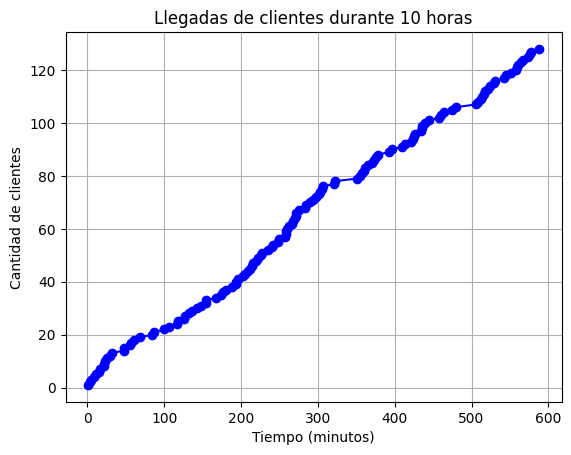

Tiempo promedio entre llegadas: 4.62 minutos
Valor esperado de la distribución geométrica: 5.00 minutos


In [17]:
import numpy as np
import matplotlib.pyplot as plt

def generar_llegadas_geometrica(p, tiempo_total):
    llegadas = []
    tiempo_actual = 0

    while tiempo_actual < tiempo_total:
        tiempo_entre_llegadas = np.random.geometric(p)
        tiempo_actual += tiempo_entre_llegadas
        if tiempo_actual < tiempo_total:
            llegadas.append(tiempo_actual)

    return llegadas

p = 0.2
tiempo_total_horas = 10
tiempo_total_minutos = tiempo_total_horas * 60

llegadas_clientes = generar_llegadas_geometrica(p, tiempo_total_minutos)

tiempo_promedio_llegadas = np.mean(np.diff(llegadas_clientes))

plt.plot(llegadas_clientes, np.arange(1, len(llegadas_clientes) + 1), marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Cantidad de clientes')
plt.title('Llegadas de clientes durante 10 horas')
plt.grid(True)
plt.show()

valor_esperado_geometrica = 1 / p
print(f"Tiempo promedio entre llegadas: {tiempo_promedio_llegadas:.2f} minutos")
print(f"Valor esperado de la distribución geométrica: {valor_esperado_geometrica:.2f} minutos")



3. ¿Qué modela la distribución geométrica en este escenario?
- La distribución geométrica en este escenario modela el tiempo que transcurre entre la llegada de dos clientes consecutivos, considerando que cada llegada de cliente tiene una probabilidad independiente de 0.2 de ocurrir en cualquier momento. 
4. ¿Cómo se compara el tiempo promedio entre llegadas con el valor esperado de la distribución geométrica?
- La comparación nos muestra que el tiempo promedio entre llegadas (4.62 minutos) es ligeramente menor que el valor esperado teórico de la distribución geométrica (5 minutos). Esto indica que, en promedio, los clientes están llegando un poco más rápido de lo que se esperaría según la distribución geométrica con p=0.2.

## Tasks 2
Modele los tiempos de servicio en un sistema de colas utilizando una distribución binomial negativa.
1. Genere una muestra aleatoria de 500 tiempos de servicio a partir de una distribución binomial negativa con
parámetros r=5 y p=0,4.
2. Trace un histograma de los tiempos de servicio y calcule la media y la varianza.
3. ¿Cómo se ajusta la distribución binomial negativa a los datos de tiempo de servicio?
4. Compare la media y la varianza de los datos con los valores teóricos de la distribución binomial negativa

In [2]:
import numpy as np

r = 5
p = 0.4

muestras = np.random.negative_binomial(r, p, 500)

print("Muestra de tiempos de servicio:")
print(muestras[:10])


Muestra de tiempos de servicio:
[ 9  9  8  6 10 15  8  3  7  9]


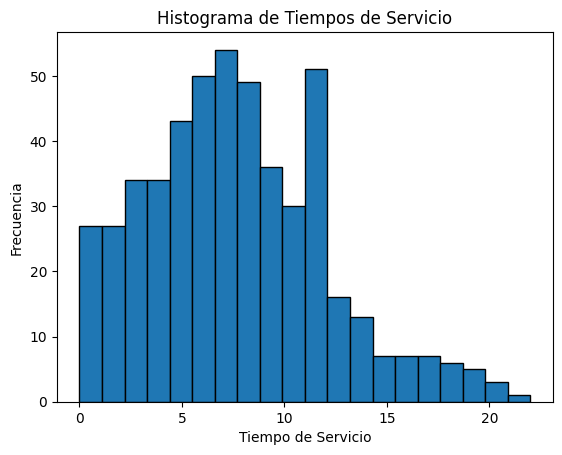

Media de los tiempos de servicio: 7.64
Varianza de los tiempos de servicio: 18.378400000000003


In [5]:
import matplotlib.pyplot as plt

media = np.mean(muestras)
varianza = np.var(muestras)
plt.hist(muestras, bins=20, edgecolor='black')
plt.xlabel('Tiempo de Servicio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Tiempos de Servicio')
plt.show()

print("Media de los tiempos de servicio:", media)
print("Varianza de los tiempos de servicio:", varianza)


# ¿Cómo se ajusta la distribución binomial negativa a los datos de tiempo de servicio?

Tras observar el histograma, la distribución binomial negativa podría ser una buena candidata para describir los datos de tiempo de servicio. Esto se debe a que el histograma tiene un pequeño sesgo hacia la izquierda, esto concuerda con la asimetría típica de la distribución binomial negativa, que generalmente muestra una cola larga hacia la derecha.

In [4]:
media_teorica = r * (1 - p) / p
varianza_teorica = r * (1 - p) / (p ** 2)

print("Media teórica:", media_teorica)
print("Varianza teórica:", varianza_teorica)
print("Media calculada de los tiempos de servicio:", media)
print("Varianza calculada de los tiempos de servicio:", varianza)


Media teórica: 7.5
Varianza teórica: 18.749999999999996
Media calculada de los tiempos de servicio: 7.64
Varianza calculada de los tiempos de servicio: 18.378400000000003


# Task 3

Deberá analizar los tiempos de procesamiento en un sistema usando una distribución hipergeométrica
1. Simule los tiempos de procesamiento de 50 tareas en un sistema con 10 artículos defectuosos y 40
artículos no defectuosos.
2. Grafique los tiempos de procesamiento y calcule la media y la varianza.
3. ¿Cómo modela la distribución hipergeométrica los tiempos de procesamiento en este escenario?
4. ¿Existen patrones en los tiempos de procesamiento de los artículos defectuosos frente a los no
defectuosos?

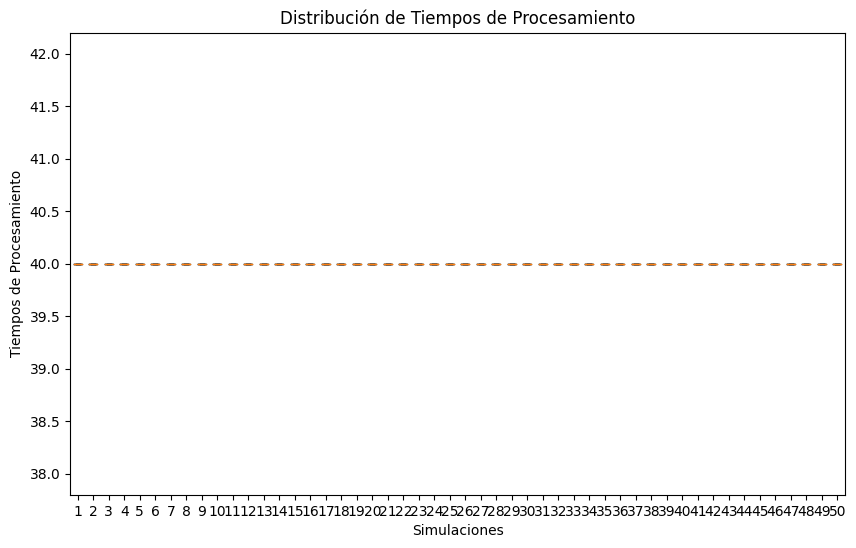

Media de tiempos de procesamiento: 40.0
Varianza de tiempos de procesamiento: 0.0


In [39]:
import numpy as np
import matplotlib.pyplot as plt

def simulacion_tiempos_procesamiento(num_tareas, num_defectuosos, num_no_defectuosos, num_simulaciones):
    resultados_simulacion = []
    for _ in range(num_simulaciones):
        tiempos_procesamiento = np.random.hypergeometric(num_no_defectuosos, num_defectuosos, num_tareas, size=50)
        resultados_simulacion.append(tiempos_procesamiento)
    return np.array(resultados_simulacion)
    

num_tareas = 50
num_defectuosos = 10
num_no_defectuosos = 40
num_simulaciones = 1000

resultados_simulacion = simulacion_tiempos_procesamiento(num_tareas, num_defectuosos, num_no_defectuosos, num_simulaciones)

medias = np.mean(resultados_simulacion)
varianzas = np.var(resultados_simulacion)

plt.figure(figsize=(10, 6))
plt.boxplot(resultados_simulacion, showfliers=False)
plt.xlabel('Simulaciones')
plt.ylabel('Tiempos de Procesamiento')
plt.title('Distribución de Tiempos de Procesamiento')
plt.show()

print("Media de tiempos de procesamiento:", np.mean(medias))
print("Varianza de tiempos de procesamiento:", np.mean(varianzas))


# Task 4

En este ejercicio deberá comparar la bondad de ajuste (goodness-of-fit) de diferentes distribuciones de probabilidad
para un conjunto de datos determinado..
1. Genere una muestra aleatoria de 1000 puntos de datos de una distribución desconocida.
2. Ajuste varias (mínimo 2) distribuciones (e.gj., normal, exponencial, gamma) a los datos mediante MLE.
3. Trace los histogramas de los datos y las distribuciones que mejor se ajustan en el mismo gráfico.
4. ¿Qué distribución representa mejor los datos basados en la inspección visual?
5. Realice una prueba de bondad de ajuste (p. ej., Kolmogorov-Smirnov) para cada distribución e interprete los
resultados.

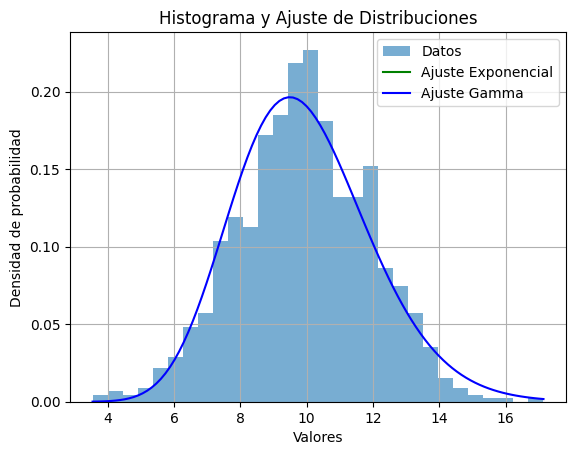

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, gamma
from scipy.optimize import minimize

np.random.seed(123)
datos_aleatorios = np.random.normal(loc=10, scale=2, size=1000)

def expon_pdf(x, lambd):
    return expon.pdf(x, scale=1.0 / lambd)

def gamma_pdf(x, k, theta):
    return gamma.pdf(x, k, scale=theta)

def neg_log_likelihood_expon(params):
    lambd = params[0]
    return -np.sum(np.log(expon_pdf(datos_aleatorios, lambd)))

def neg_log_likelihood_gamma(params):
    k, theta = params
    return -np.sum(np.log(gamma_pdf(datos_aleatorios, k, theta)))

result_expon = minimize(neg_log_likelihood_expon, [1])
lambd_expon = result_expon.x[0]

result_gamma = minimize(neg_log_likelihood_gamma, [1, 1])
k_gamma, theta_gamma = result_gamma.x

plt.hist(datos_aleatorios, bins=30, density=True, alpha=0.6, label='Datos')
x = np.linspace(datos_aleatorios.min(), datos_aleatorios.max(), 100)

plt.plot(x, expon_pdf(x, lambd_expon), 'g-', label='Ajuste Exponencial')
plt.plot(x, gamma_pdf(x, k_gamma, theta_gamma), 'b-', label='Ajuste Gamma')

plt.legend()
plt.xlabel('Valores')
plt.ylabel('Densidad de probabilidad')
plt.title('Histograma y Ajuste de Distribuciones')
plt.grid(True)
plt.show()


La gráfica que mejor se ajusta a los datos es de la distribución Gamma ya que se asemeja a la forma de la distribución de los datos generados.

In [16]:
from scipy.stats import kstest

ks_exponencial, p_exponencial = kstest(datos_aleatorios, 'expon', args=(0, 1.0 / lambd_expon))
print("\nPrueba de Kolmogorov-Smirnov para distribución exponencial:")
print("KS Statistic:", ks_exponencial)
print("p-value:", p_exponencial)

ks_gamma, p_gamma = kstest(datos_aleatorios, 'gamma', args=(k_gamma, 0, theta_gamma))
print("\nPrueba de Kolmogorov-Smirnov para distribución gamma:")
print("KS Statistic:", ks_gamma)
print("p-value:", p_gamma)


Prueba de Kolmogorov-Smirnov para distribución exponencial:
KS Statistic: nan
p-value: nan

Prueba de Kolmogorov-Smirnov para distribución gamma:
KS Statistic: 0.043570531374380495
p-value: 0.04356658082748022


Como se puede ver, la exponencial definitivamente no se ajusta a la distribución aleatoria. Por otro lado, aunque se mencióno que la gamma se asemeja visualmente mejor a los datos, al tener un valor de p de 0.04 se puede rechazar la hipótesis nula de que la distribución gamma se ajusta a los datos. Esto puede indicar que aunque no se ajusta perfectamente, la distribución gamma es una mejor opción que la exponencial. Se deben realizar más distribuciones o cambiar el tamaño de la muestra para obtener mejores resultados.